In [1]:
import torch
import torchvision
import numpy as np
import os.path as osp
import os

In [2]:
CUDA = torch.cuda.is_available()
CUDA = False

In [3]:
# GLOBALS
# vot_path = "../../../vot2016/"
vot_path = "/home/zabulskyy/Datasets/vot2016/"
# yolo_pred_path = "../yolo_predictions/extended"
yolo_pred_path = "/mnt/sshfs/YOLO-tracker/yolo_predictions/casual"
crit_vals = {
    "iou": 100,
    "dist2": 1,
#     "abs_pos": 1,
#     "rel_pos": 1,
    "cc": 1,  # class_correspondence
    "init_dist2": 1000000,
}
with open("../../yoloTorch/data/coco.names", "r") as f:
    classes = f.read().split("\n")[:-1]
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [4]:
def read_csv(file="correlations.csv"):
    with open(file, 'r') as file:
        l = file.read().split("\n")
        l.pop(-1)
        l = [[float(x) for x in y.split(",")[:-1]] for y in l]   
        return torch.tensor(l)
    

In [5]:
cm = read_csv()

In [6]:
def dist2(row1, row2):
    pass

def the_closest(row_to_compare, rows):
    pass

def iou(boxA, boxB):
    pass

def the_most_iou(row_to_compare, rows):
    pass

def interpolate(data):
    pass

def read_gt(vot_class, vot_path=vot_path, force_square=True):
    pass

def read_yolo_pred(vot_class, yolo_pred_path=yolo_pred_path, force_square=True):
    pass

def eval_energy(bb1, bb2, cv=crit_vals):
    pass

def class_correlations(class_probs1, class_probs2):
    pass

def eval_class_corr(cls1, cls2, correlations=cm):
    pass

In [7]:
def dist2(row1, row2):
    x11, y11, x12, y12 = row1[1:5] if len(row1) != 4 else row1[:]
    x21, y21, x22, y22 = row2[1:5] if len(row2) != 4 else row2[:]
    x1, y1 = (x11 + x12) / 2, (y11 + y12) / 2
    x2, y2 = (x21 + x22) / 2, (y21 + y22) / 2
    X = (x1 - x2) ** 2
    Y = (y1 - y2) ** 2
    res = float((X + Y) ** 0.5)
    return res
def the_closest(row_to_compare, rows):
    m, i = np.infty, 0
    for n, row in enumerate(rows):
        d = dist2(row, row_to_compare)
        if d < m:
            m = float(d)
            i = n
    return rows[i], i

In [8]:
def iou(boxA, boxB):
    boxA = boxA[1:5] if len(boxA) != 4 else boxA
    boxB = boxB[1:5] if len(boxB) != 4 else boxB

    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    res = interArea / float(boxAArea + boxBArea - interArea)
    return res
def the_most_iou(row_to_compare, rows):
    M, i = 0, 0
    for n, row in enumerate(rows):
        v = iou(row, row_to_compare)
        if v > M:
            M = float(v)
            i = n
    return rows[i], i

In [9]:
def generate_subframes(row1, row2, width):
    frame1, frame2 = int(row1[0]), int(row2[0])
    diff = frame1 - frame2
    if diff == 1:
        return None
    result = torch.zeros((frame2 - frame1 - 1, width))
    # result[:, -1] = row1[-1]
    step = (row1 - row2) / diff
    for frame_n in range(frame2 - frame1 - 1):
        result[frame_n] = row1 + (step) * (frame_n + 1)
    return result


def merge_frames(*rows):
    result = torch.zeros((1, 8))
    n = len(rows)
    for row in rows:
        result += row
    return result / n


def the_closest(row_to_compare, rows):
    def dist(row1, row2):
        x11, y11, x12, y12 = row1[1:5] if len(row1) != 4 else row1[:]
        x21, y21, x22, y22 = row2[1:5] if len(row2) != 4 else row2[:]
        x1, y1 = (x11 + x12) / 2, (y11 + y12) / 2
        x2, y2 = (x21 + x22) / 2, (y21 + y22) / 2
        X = (x1 - x2) ** 2
        Y = (y1 - y2) ** 2
        res = float((X + Y) ** 0.5)
        return res

    m, i = np.infty, 0
    for n, row in enumerate(rows):
        d = dist(row, row_to_compare)
        if d < m:
            m = float(d)
            i = n
    return rows[i], i

def fill_first(tensor):
    FIRST = tensor[0]
    for i in range(int(FIRST[0]) - 1, -1, -1):
        row = FIRST
        row[0] = i
        row = row.view((1, -1))
        tensor = torch.cat((row, tensor))
    return tensor


def fill_last(tensor, NUM_FRAMES):
    last = tensor[tensor[:, 0] != 0][-1]
    for i in range(int(last[0]) + 1, NUM_FRAMES):
        row = last
        row[0] = i
        row = row.view((1, -1))
        tensor[i] = row
    return tensor


def most_frequent_class(results):
    counts = np.bincount(results[:, -1])
    return np.argmax(counts)


def interpolate(data):
    """
    interpolate gaps
    choose one detection among multiple, by picking the closest one by the euclidean distance
    ignore class labels
    :param OUTPUT: tensor
    :param NUM_FRAMES:
    :param CUDA: bool - if cuda is available
    :return: interpolated tensor
    """
    OUTPUT = data["output"]
    NUM_FRAMES = data["num_frames"]
    CUDA = data["CUDA"]

    width = OUTPUT.size()[1]
    result = torch.zeros((NUM_FRAMES, width))
    if CUDA:
        result = result.cuda()

    if OUTPUT[0][0] != 0:
        OUTPUT = fill_first(OUTPUT)

    output_iter = 0
    res_iter = 0
    while res_iter != NUM_FRAMES:
        if (output_iter > len(OUTPUT) - 1):
            # break
            result = fill_last(result, NUM_FRAMES)
            break
        if output_iter == OUTPUT.shape[0] - 1:
            result[res_iter] = OUTPUT[output_iter]
            output_iter += 1
            res_iter += 1
            continue

        # next frame is interpolated
        if OUTPUT[output_iter][0] == OUTPUT[output_iter + 1][0] - 1:
            result[res_iter] = OUTPUT[output_iter]
            output_iter += 1
            res_iter += 1
            continue

        # missing detection on some frames, fill with missing
        if OUTPUT[output_iter][0] + 1 < OUTPUT[output_iter + 1][0]:
            subframes = generate_subframes(
                OUTPUT[output_iter], OUTPUT[output_iter + 1], width)
            result[res_iter] = OUTPUT[output_iter]
            for subframe in subframes:
                res_iter += 1
                result[res_iter] = subframe
            output_iter += 1
            res_iter += 1
            continue

        # this frame contains multiple detections, have to choose one
        if OUTPUT[output_iter][0] == OUTPUT[output_iter + 1][0]:
            frame = OUTPUT[output_iter][0]
            to_cut = OUTPUT[OUTPUT[:, 0] == frame]
            # closest, _ = the_closest(result[res_iter - 1], to_cut)
            # result[res_iter] = closest
            closest, _ = the_most_iou(result[res_iter - 1], to_cut)
            result[res_iter] = closest

            output_iter += len(to_cut)
            res_iter += 1

            if output_iter >= OUTPUT.shape[0] - 1:
                break

            # missing detection on some frames, fill with missing
            if OUTPUT[output_iter - 1][0] + 1 < OUTPUT[output_iter][0]:
                subframes = generate_subframes(
                    result[res_iter - 1], OUTPUT[output_iter], width)
                # result[res_iter] = OUTPUT[output_iter]
                for subframe in subframes:
                    result[res_iter] = subframe
                    res_iter += 1
            continue
    return result

In [10]:
def read_gt(vot_class, vot_path=vot_path, force_square=True):
    gt_file = osp.join(vot_path, vot_class, "groundtruth.txt")
    with open(gt_file, 'r') as file:
        l =file.read().split("\n")
        l.pop(-1)
        l = [[float(x) for x in y.split(",")] for y in l]
        if force_square:
            l = [[min(m[::2]), min(m[1::2]), max(m[::2]), max(m[1::2])] for m in l]   
        return torch.tensor(l)
    
def read_full_gt(vot_path=vot_path, force_square=True):
    vot_classes = [x for x in os.listdir(vot_path) if not x.endswith(".txt")]
    X = list()
    for vot_class in vot_classes:
        gt_file = osp.join(vot_path, vot_class, "groundtruth.txt")
        with open(gt_file, 'r') as file:
            l =file.read().split("\n")
            l.pop(-1)
            l = [[float(x) for x in y.split(",")] for y in l]
            if force_square:
                l = [[min(m[::2]), min(m[1::2]), max(m[::2]), max(m[1::2])] for m in l]   
        X.append(l)
    return torch.tensor(X)

In [11]:
def read_yolo_pred(vot_class, yolo_pred_path=yolo_pred_path, pred_format="csv", first_len=True):
    yolo_pred_file = osp.join(yolo_pred_path, vot_class + "." + pred_format)
    with open(yolo_pred_file, 'r') as file:
        l =file.read().split("\n")
        l.pop(-1)
        im_len = -1
        if first_len:
            im_len = float(l.pop(0))
        l = [[float(x) for x in y.split(",")] for y in l]            
        return torch.tensor(l), im_len
    

In [12]:
yyy = read_yolo_pred("soldier")
yyy

(tensor([[  116.0000,   629.9180,   486.0838,  1021.4323,   690.0601,
              0.6904,     0.9911,    14.0000],
         [  117.0000,   597.9113,   491.3821,   931.3621,   691.8236,
              0.5841,     0.9561,    14.0000],
         [  118.0000,   584.9228,   491.9425,   938.2305,   689.5849,
              0.8888,     0.9837,    14.0000],
         [  119.0000,   600.6072,   505.7502,   902.2207,   720.0000,
              0.7223,     0.5068,    14.0000],
         [  122.0000,   576.5826,   501.4527,   922.8984,   682.0195,
              0.7000,     0.7961,    14.0000],
         [  124.0000,   566.2958,   490.2715,   893.3004,   701.5590,
              0.7951,     0.8088,     0.0000],
         [  125.0000,   566.8380,   483.4505,   897.0085,   703.2112,
              0.7221,     0.4176,     0.0000],
         [  126.0000,   543.4904,   487.3969,   897.7859,   684.7973,
              0.6293,     0.8056,    14.0000],
         [  127.0000,   544.7675,   482.6679,   886.1191,   690.

In [13]:
# compute class correlation
def ccc(classes_probs):
    # classes_probs.shape = (bboxes, classes)
    corr_mat = torch.zeros((classes_probs.shape[1], classes_probs.shape[1], ))

    for cls in range(len(classes_probs[0])):
        col = classes_probs[:, cls].view((-1, 1))
        tX = col * classes_probs
        sX = torch.sum(tX, dim=0)
        corr_mat[cls] = sX
    return corr_mat

def corr(col1, col2):
    mean1, mean2 = torch.mean(col1), torch.mean(col2)
    cm1, cm2 = col1 - mean1, col2 - mean2
    top = sum(cm1 * cm2)
    bot = torch.sqrt(sum(cm1 ** 2) * sum(cm2 ** 2))
    return top / bot

# compute class correlation coefficient
def cccc(classes_probs):
    # classes_probs.shape = (bboxes, classes)
    corr_mat = torch.zeros((classes_probs.shape[1], classes_probs.shape[1], ))
    num_classes = len(classes_probs[0])
    for cls1 in range(num_classes):
        col1 = classes_probs[:, cls1].view((-1, 1))
        for cls2 in range(cls1 + 1, num_classes):
            print("{}.{} / {}".format(cls1+1, cls2+1, num_classes))
            col2 = classes_probs[:, cls2].view((-1, 1))
            _corr = corr(col1, col2)
#             _corr = np.corrcoef(col1, col2)
            corr_mat[cls1, cls2] = _corr
    return corr_mat


In [14]:
def read_all_yolo_preds(path=yolo_pred_path, pred_format="csv"):
    X = []
    for vot_class in os.listdir(path):
        yolo_pred_file = osp.join(path, vot_class)
        with open(yolo_pred_file, 'r') as file:
            l = file.read().split("\n")
            l.pop(-1)
            l.pop(0)
            im_len = -1
            for i in l:
                X.append([float(x) for x in i.split(",")])
    X = torch.tensor(X)
#     cls_probs = X[:, 6:]
    return X

In [15]:
def eval_single_class_corr(cls1 : int, cls2 : int, correlations=cm):
    return float(cm[cls1][cls2])

def eval_whole_class_corr(cls1, cls2, correlations=cm):
    # TODO: consider if this worth it
    # too complicated yet
    pass

In [16]:
def normalise(tensor):
    mean = torch.mean(tensor)
    std = torch.std(tensor)
    return (tensor - mean) / std

In [17]:
def write_csv(matrix, file="correlations.csv"):
    for i in matrix.tolist():
        for j in i:
            print(j, sep=", ", end=", ", file=open(file, "a+"))
        print(file=open(file, "a+"))

In [18]:
# class_i = classes.index("orange")
# cm_vals = torch.sort(cm[class_i], descending=True)[0]
# cm_idxs = torch.sort(cm[class_i], descending=True)[1]

# i = 0
# while i != 80:
#     print(classes[cm_idxs[i]], "\t\t" , float(cm_vals[i]))
#     i += 1
   

In [19]:
def eval_energy(bb1, bb2, cv=crit_vals, ban_negative_cc=True):
    box1, box2 = bb1[1:5], bb2[1:5]
    cls1, cls2 = bb1[6: ], bb2[6: ]  # 5'th column is the precision of the bbox
    class1, class2 = torch.argmax(cls1), torch.argmax(cls2)
    
    _iou = iou(box1, box2)
    _cc = eval_single_class_corr(class1, class2)
    _dist2 = dist2(box1, box2)  # probably not

    return cv["iou"] * _iou, cv["cc"] * _cc, cv["dist2"] * _dist2

In [20]:
def cebtf(frame1, frame2, cv=crit_vals, ban_negative_cc=True):  # calc_energies_between_two_frames
    boxes = torch.zeros((len(frame1)))
    energies = torch.zeros((len(frame1)))
    for i in range(len(frame1)):
        max_energy = 0
        max_energy_index = 0
        for j in range(len(frame2)):
            energy = eval_energy(frame1[i], frame2[j], cv=crit_vals, ban_negative_cc=ban_negative_cc)
            
            if ban_negative_cc and energy[1] < 0:
                energy = 0
            else:
                energy = energy[0] + energy[1]  # iou and class correspondence
                
            if energy > max_energy:
                max_energy = energy
                max_energy_index = j
                
        boxes[i] = max_energy_index
        energies[i] = max_energy
    return boxes, energies
          

In [21]:
def the_most_iou(row_to_compare, rows):
    M, i = 0, 0
    for n, row in enumerate(rows):
        v = iou(row, row_to_compare)
        if v > M:
            M = float(v)
            i = n
    return rows[i], i

def pp_first(data):
    # detects the closest object to FIRST gt box and removes the rest on the FIRST frame
    CUDA = data["CUDA"]
    output = data["output"]
    first = data["first"]

    tcc, _ = the_most_iou(first, output[:, 1:5])
#     print("PP_FIRST")
#     print(first, output, tcc, sep="\n")
#     print("PP_FIRST")
    
    # only detections close to the true FIRST frame
    
    output = replace_first_frame(tcc, output)
    return output

def replace_first_frame(to_replace, OUTPUT):
    to_replace = to_replace[:4]
#     print(to_replace)
    OUTPUT = OUTPUT[OUTPUT[:, 0] != 0]
#     print(OUTPUT.shape)
    to_replace = to_replace.view((1, -1))
    _to_replace = torch.zeros((1, 8))
    _to_replace[0][1:5] = to_replace[0]
    return torch.cat((_to_replace, OUTPUT))

In [22]:
def get_first(vot_class):
    with open(osp.join(vot_path, vot_class, "groundtruth.txt"), 'r') as file:
        l = [float(x) for x in file.read().split("\n")[0].split(",")]
        X, Y = l[::2], l[1::2]
        l = [min(X), min(Y), max(X), max(Y)]
        l = torch.tensor([float(x) for x in l])
        return l

In [23]:
def initial_energy(first_boxes, method="ltd2", cv=crit_vals, ): 
    l = first_boxes.shape[0]
    ies = torch.zeros(l)  # initial_energies
    # ltd2 = least total dist2
    for i in range(l):
        for j in range(l):
            ie = dist2(first_boxes[i],first_boxes[j])
            ies[i] += ie
    ies = 1 / ies * crit_vals["init_dist2"]
    return ies
            

In [47]:
def do_dp(vot_class, total_res):

    print("\n\t", vot_class)
    yp, imlen = read_yolo_pred(vot_class)  # yolo predictions
    
    data = dict()
    data["output"] = yp
    data["num_frames"] = int(imlen)
    data["CUDA"] = CUDA
    data["first"] = get_first(vot_class)
    
#     print(data["first"])
#     print(data["output"][:10])
#     data["output"] = pp_first(data)
#     print(data["output"][:4])

    
    frames_with_detection = sorted(list(set(data["output"][:,0].tolist())))
    ffwdi = frames_with_detection[0]  # first_frame_with_detection_index
    first_boxes = data["output"][data["output"][:, 0] == ffwdi]
    
    path = torch.zeros((len(first_boxes), imlen))
    energies = torch.zeros((len(first_boxes), imlen))
    

    prev_boxes = first_boxes
    path[:, 0] = first_boxes[0][0]
    
    # calculate energies
    print("energies")
    for n, i in enumerate(frames_with_detection[:]):
        
#         if n == 0:
#             continue
            
        if n % 100 == 99:
            print(str(n / len(frames_with_detection[1:]) * 100)[:4], end="% ")
            
        i_boxes = data["output"][data["output"][:, 0] == i]
        boxes, energy = cebtf(prev_boxes, i_boxes)
        path[:, int(n)] = boxes
        energies[:, int(n)] += energy
        prev_boxes = i_boxes[boxes.long()]
        
    verdict = torch.sum(energies, dim=1)
    
    # init energies    
    ie = initial_energy(first_boxes, method="ltd2")
    ie = ie / max(ie) * max(verdict) * .1
    
    if verdict.shape != torch.Size([1]):
        verdict += ie

    
    first_bb_candidates = (verdict == torch.max(verdict)).nonzero().view(-1).tolist()
    res_i = path[first_bb_candidates].view(-1).int()
    len(res_i), len(frames_with_detection)
    res = torch.zeros((len(frames_with_detection), 5))

    # prepare for interpolation
    for n, i in enumerate(frames_with_detection[:]):
        cfp = data["output"][data["output"][:, 0] == i]  # current_frame_predictions
        index = res_i[n]
        cp = cfp[index] # chosen_prediction
        res[int(n)] = cp[:5]
        
    
    print("\ninterpolation")
    total_res[vot_class] = interpolate(data)[:, 1:5].tolist()
    return total_res
    

In [48]:
for vot_class in [x for x in os.listdir(vot_path) if not x.endswith(".txt")]: #["birds2"]:#
    do_dp(vot_class, total_res)


	 blanket
energies
44.1% 88.8% 
interpolation

	 bolt2
energies
33.9% 68.1% 
interpolation

	 traffic
energies
52.1% 
interpolation

	 ball1
energies
95.1% 
interpolation

	 leaves
energies

interpolation

	 pedestrian1
energies
71.2% 
interpolation

	 singer3
energies
76.1% 
interpolation

	 helicopter
energies
14.5% 29.2% 43.9% 58.5% 73.2% 87.9% 
interpolation

	 godfather
energies
27.1% 54.5% 81.9% 
interpolation

	 soccer1
energies
34.6% 69.5% 
interpolation

	 book
energies
56.8% 
interpolation

	 tunnel
energies
73.8% 
interpolation

	 gymnastics1
energies
17.5% 35.2% 52.9% 70.6% 88.3% 
interpolation

	 basketball
energies
13.6% 27.4% 41.2% 55.1% 68.9% 82.7% 96.5% 
interpolation

	 birds1
energies
54.0% 
interpolation

	 car1
energies
14.0% 28.1% 42.2% 56.4% 70.5% 84.7% 98.8% 
interpolation

	 ball2
energies

interpolation

	 birds2
energies
18.4% 36.9% 55.5% 74.1% 92.7% 
interpolation

	 motocross1
energies
86.0% 
interpolation

	 bmx
energies

interpolation

	 gymnastics2
ener

In [49]:
def save(res, folder, ext="csv", nm_fr=None):
    if not os.path.exists(folder):
        os.makedirs(folder)
    for name in res:
        if nm_fr is not None:
            print(nm_fr[name], file=open(osp.join(folder, name + "." + ext), 'w+'))
            print("\n".join([",".join([str(a) for a in x]) for x in res[name]]),
                  file=open(osp.join(folder, name + "." + ext), 'a'))
        else:
            print("\n".join([",".join([str(a) for a in x]) for x in res[name]]),
                  file=open(osp.join(folder, name + "." + ext), 'w+'))


In [50]:
save(total_res, "first_results_more_iou_first_init")


In [51]:
def iou(cords1, cords2):
    if len(cords2) < 4:
        if (cords2[0] == 1):
            return 1
        return 1
    if (len(cords1) == 8):
        X1, Y1 = cords1[::2], cords1[1::2]
        cords1 = [min(X1), min(Y1), max(X1),  max(Y1)]
    if (len(cords2) == 8):
        X2, Y2 = cords2[::2], cords2[1::2]
        cords2 = [min(X2), min(Y2), max(X2),  max(Y2)]
    xA = max(cords1[0], cords2[0])
    yA = max(cords1[1], cords2[1])
    xB = min(cords1[2], cords2[2])
    yB = min(cords1[3], cords2[3])
    interArea = max(0, xB - xA + 1e-32) * max(0, yB - yA + 1e-32)
    cords1Area = (cords1[2] - cords1[0] + 1e-32) * \
        (cords1[3] - cords1[1] + 1e-32)
    cords2Area = (cords2[2] - cords2[0] + 1e-32) * \
        (cords2[3] - cords2[1] + 1e-32)
    return interArea / float(cords1Area + cords2Area - interArea)

In [52]:
def open_and_cast(file):
    with open(file, 'r') as f:
        pred = [s.split(',') for s in f.read().split("\n")]
        for i in range(len(pred)):
            if pred[i] == [""]:
                pred.pop(i)
                continue
            pred[i] = [float(x) for x in pred[i]]
    return pred

In [53]:
def grade(gt_path, pred_path, method="mean_iou"):
    gt = open_and_cast(gt_path)
    pred = open_and_cast(pred_path)
    grades = [iou(gt[i], pred[i]) for i in range(len(gt))]
    return sum(grades) / len(grades), grades

In [54]:
def grade_vot(vot_folder, res_folder, gt_filename="groundtruth.txt", ext=".csv"):
    vot_folders = sorted(os.listdir(vot_folder))
    res = dict()
    for i in range(len(vot_folders)):
        if (vot_folders[i].endswith(".txt")):
            continue
        gt_file = osp.join(vot_folder, vot_folders[i], gt_filename)
        pred_file = osp.join(res_folder, vot_folders[i] + ext)

        # print("++++++++++++")
        # print(gt_file) 
        # print(pred_file)
        # print("++++++++++++")

        single_grade = grade(gt_file, pred_file)[0]
        res[vot_folders[i]] = single_grade
    mean = 0
    for i in res:
        mean += res[i]
    mean /= len(res.keys())
    return mean, res

In [57]:
grade_vot(vot_path, "first_results_more_iou_first_init")

(0.22004626221827686,
 {'bag': 0.4734690082964327,
  'ball1': 0.0,
  'ball2': 0.0,
  'basketball': 0.037166446965819375,
  'birds1': 0.3857996177245227,
  'birds2': 0.0035776358800394996,
  'blanket': 0.17251554254149717,
  'bmx': 0.62978999338401,
  'bolt1': 3.584260479546721e-08,
  'bolt2': 0.13497477843260824,
  'book': 0.14401596028679461,
  'butterfly': 0.2175166359839938,
  'car1': 0.6468033696283284,
  'car2': 0.0626381484846376,
  'crossing': 0.002823681420859339,
  'dinosaur': 0.14056647665486335,
  'fernando': 0.1917850014166966,
  'fish1': 0.0100746068440364,
  'fish2': 0.02869322226160817,
  'fish3': 0.4081342253822134,
  'fish4': 0.04605607976707805,
  'girl': 0.49621718054810116,
  'glove': 0.04287970289811811,
  'godfather': 0.007925794116231654,
  'graduate': 0.2736615741976816,
  'gymnastics1': 0.334882907619798,
  'gymnastics2': 0.4318034792212877,
  'gymnastics3': 0.07143412677907762,
  'gymnastics4': 0.1007998577488381,
  'hand': 0.08430209782878324,
  'handball1': 

In [58]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path as osp
import argparse
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from random import randrange
import numpy as np

In [59]:
def plot_single_arr(im_path, pr_arr=None, pr_idx=0, gt_arr=None, gt_idx=0, force_square=False):
    im = Image.open(im_path)
    plt.imshow(im)

    if pr_arr is not None:
        l = pr_arr[pr_idx]
        if l == "":
            return
        pr_bb = [float(x) for x in l.split(',')]
        if len(pr_bb) < 4:
            return
        if force_square:
            X, Y = pr_bb[::2], pr_bb[1::2]
            pr_bb = [min(X), min(Y), max(X),  max(Y)]
            plt.plot([pr_bb[0], pr_bb[2], pr_bb[2], pr_bb[0], pr_bb[0], ],
                     [pr_bb[1], pr_bb[1], pr_bb[3], pr_bb[3], pr_bb[1], ], 'r-', lw=2)
        elif (len(pr_bb) == 8):
            plt.plot(pr_bb[::2] + [pr_bb[0]],
                     pr_bb[1::2] + [pr_bb[1]], 'r-', lw=2)
        else:
            plt.plot([pr_bb[0], pr_bb[2], pr_bb[2], pr_bb[0], pr_bb[0], ],
                     [pr_bb[1], pr_bb[1], pr_bb[3], pr_bb[3], pr_bb[1], ], 'r-', lw=2)

    if gt_arr is not None:
        l = gt_arr[gt_idx]
        if l == "":
            return
        gt_bb = [float(x) for x in l.split(',')]

        if (force_square):
            X, Y = gt_bb[::2], gt_bb[1::2]
            gt_bb = [min(X), min(Y), max(X),  max(Y)]
            plt.plot([gt_bb[0], gt_bb[2], gt_bb[2], gt_bb[0], gt_bb[0], ],
                     [gt_bb[1], gt_bb[1], gt_bb[3], gt_bb[3], gt_bb[1], ], 'b-', lw=2)
        elif (len(gt_bb) == 8):
            plt.plot(gt_bb[::2] + [gt_bb[0]],
                     gt_bb[1::2] + [gt_bb[1]], 'b-', lw=2)
        else:
            plt.plot([gt_bb[0], gt_bb[2], gt_bb[2], gt_bb[0], gt_bb[0], ],
                     [gt_bb[1], gt_bb[1], gt_bb[3], gt_bb[3], gt_bb[1], ], 'b-', lw=2)


def plot_single(im_path, pr_path=None, pr_idx=0, gt_path=None, gt_idx=0, force_square=False):
    """
    coords: [x1, y1, x2, y2, x3, y3, x4, y4]
    """

    im = Image.open(im_path)
    plt.imshow(im)

    if pr_path is not None:
        with open(pr_path, 'r') as f:
            l = f.read().split("\n")[pr_idx]
            if l == "":
                return
            pr_bb = [float(x) for x in l.split(',')]

        if (force_square):
            X, Y = pr_bb[::2], pr_bb[1::2]
            pr_bb = [min(X), min(Y), max(X),  max(Y)]
            plt.plot([pr_bb[0], pr_bb[2], pr_bb[2], pr_bb[0], pr_bb[0], ],
                     [pr_bb[1], pr_bb[1], pr_bb[3], pr_bb[3], pr_bb[1], ], 'r-', lw=2)
        elif (len(pr_bb) == 8):
            plt.plot(pr_bb[::2] + [pr_bb[0]],
                     pr_bb[1::2] + [pr_bb[1]], 'r-', lw=2)
        else:
            plt.plot([pr_bb[0], pr_bb[2], pr_bb[2], pr_bb[0], pr_bb[0], ],
                     [pr_bb[1], pr_bb[1], pr_bb[3], pr_bb[3], pr_bb[1], ], 'r-', lw=2)

    if gt_path is not None:
        with open(gt_path, 'r') as f:
            l = f.read().split("\n")[gt_idx]
            gt_bb = [float(x) for x in l.split(',')]

        if (force_square):
            X, Y = gt_bb[::2], gt_bb[1::2]
            gt_bb = [min(X), min(Y), max(X),  max(Y)]
            plt.plot([gt_bb[0], gt_bb[2], gt_bb[2], gt_bb[0], gt_bb[0], ],
                     [gt_bb[1], gt_bb[1], gt_bb[3], gt_bb[3], gt_bb[1], ], 'b-', lw=2)
        elif (len(gt_bb) == 8):
            plt.plot(gt_bb[::2] + [gt_bb[0]],
                     gt_bb[1::2] + [gt_bb[1]], 'b-', lw=2)
        else:
            plt.plot([gt_bb[0], gt_bb[2], gt_bb[2], gt_bb[0], gt_bb[0], ],
                     [gt_bb[1], gt_bb[1], gt_bb[3], gt_bb[3], gt_bb[1], ], 'b-', lw=2)


def save_plot_single_arr(im_path, name="plot.jpg", pr_arr=None, pr_idx=0, gt_arr=None, gt_idx=0, force_square=False):
    plot_single_arr(im_path, pr_arr, pr_idx, gt_arr, gt_idx, force_square)
    plt.show()
    # plt.savefig(name)


def save_plot_single(im_path, name="plot.jpg", pr_path=None, pr_idx=0, gt_path=None, gt_idx=0, force_square=False):
    plot_single(im_path, pr_path, pr_idx, gt_path, gt_idx, force_square)
    plt.savefig(name)


def save_plot_folder(dir_path, saveto="results", pr_path=None, gt_path=None, force_square=False):
    if (not os.path.exists(saveto)):
        os.makedirs(saveto)
    files = sorted([x for x in os.listdir(dir_path) if x.endswith(".jpg")])

    if gt_path is not None:
        with open(gt_path, 'r') as f:
            gt_arr = f.read().split("\n")

    if pr_path is not None:
        with open(pr_path, 'r') as f:
            pr_arr = f.read().split("\n")

    for n, file in enumerate(files):
        name = osp.join(saveto, file)
        print("saving {}".format(name))
        save_plot_single_arr(osp.join(dir_path, file), name=name, pr_arr=pr_arr,
                             pr_idx=n, gt_arr=gt_arr, gt_idx=n, force_square=force_square)
        plt.close()


def csv2tensor(path_to_file, first_len=False):
    with open(path_to_file, 'r') as f:
        pr_arr = f.read().split("\n")
        if first_len:
            im_len = int(pr_arr.pop(0))
        else:
            im_len = -1
        pr_arr.pop(-1)
        pr_arr = [[float(y) for y in x.split(",")] for x in pr_arr]
        return torch.tensor(pr_arr), im_len


def plot_single_yolo(im_path, pr_arr, pr_idx, gt_arr, gt_idx, force_square, gs=False):
    im = np.array(Image.open(im_path), dtype=np.uint8)
    # Create figure and axes
    fig, ax = plt.subplots(1)
    # Display the image
    ax.imshow(im)
    # Create a Rectangle patch
    for row in pr_arr[pr_arr[:, 0] == pr_idx]:
        color = (randrange(1, 99) / 100, randrange(1, 99) /
                 100, randrange(1, 99) / 100) if gs == False else (.7, .7, .7)
        label = int(row[-1])
        x, y = float(row[1]), float(row[2])
        h, w = float(row[4]) - y, float(row[3]) - x
        rect = patches.Rectangle(
            (x, y), w, h, linewidth=2, edgecolor=color, facecolor='none', label=label)
        # Add the patch to the Axes
        ax.add_patch(rect)
        ax.annotate(label, (x, y), color=color, weight='bold',
                    fontsize=6, ha='left', va='top')
    # plt.show()


def save_plot_single_yolo(im_path, name="plot.jpg", pr_tensor=None, pr_idx=0, gt_tensor=None, gt_idx=0, force_square=False, gs=False):
    plot_single_yolo(im_path, pr_tensor, pr_idx,
                     gt_tensor, gt_idx, force_square, gs)
    # plt.savefig(name)


def save_plot_everything(imgs_folder=None, yolo_pred_file=None, pred_file=None, gt_file=None, saveto="results", force_square=False):
    if (not os.path.exists(saveto)):
        os.makedirs(saveto)
    files = sorted([x for x in os.listdir(imgs_folder) if x.endswith(".jpg")])

    if gt_file is not None:
        gt_tensor, gt_len = csv2tensor(gt_file)

    if pred_file is not None:
        pred_tensor, pred_len = csv2tensor(pred_file)

    if pred_file is not None:
        yolo_pred_tensor, yolo_pred_len = csv2tensor(yolo_pred_file, True)

    for n, file in enumerate(files):
        name = osp.join(saveto, file)
        print("saving {}".format(name))
        impath = osp.join(imgs_folder, file)

        plot_single_yolo(impath, yolo_pred_tensor, n,
                         gt_tensor, n, force_square, gs=True)
        plot_single(impath, pred_file, n, gt_file, n, force_square=True)
        # plt.savefig(name)
        plt.show()
        plt.close()

saving lololo/00000001.jpg


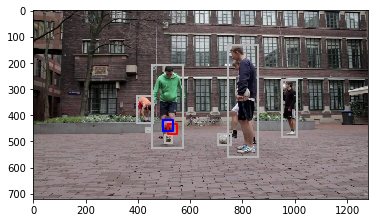

saving lololo/00000002.jpg


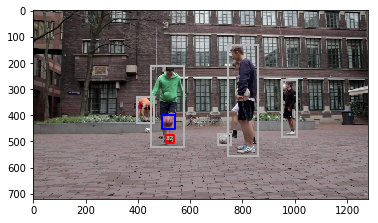

saving lololo/00000003.jpg


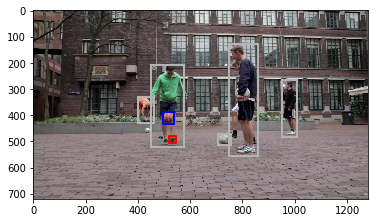

saving lololo/00000004.jpg


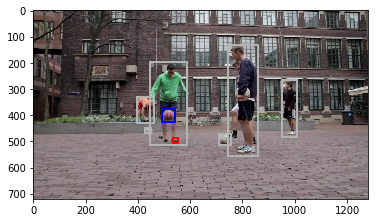

saving lololo/00000005.jpg


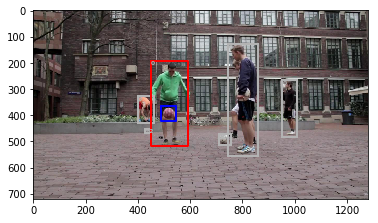

saving lololo/00000006.jpg


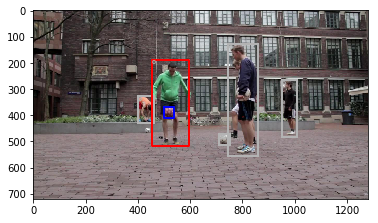

saving lololo/00000007.jpg


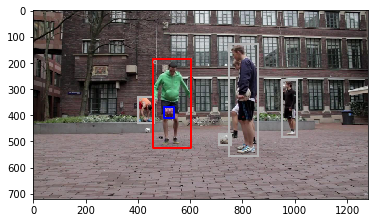

saving lololo/00000008.jpg


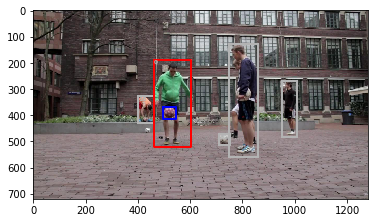

saving lololo/00000009.jpg


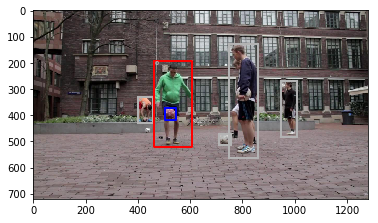

saving lololo/00000010.jpg


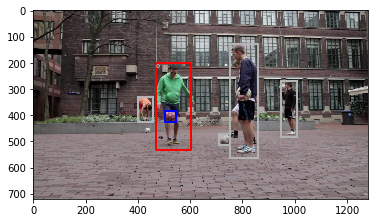

saving lololo/00000011.jpg


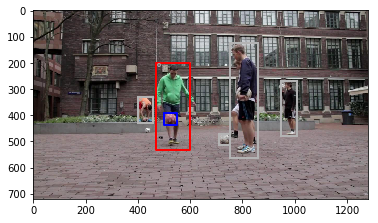

saving lololo/00000012.jpg


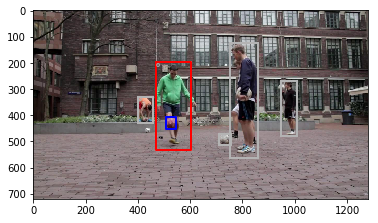

saving lololo/00000013.jpg


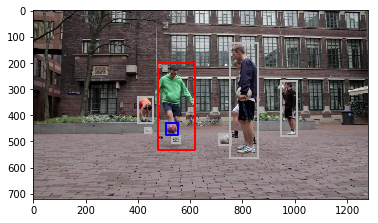

saving lololo/00000014.jpg


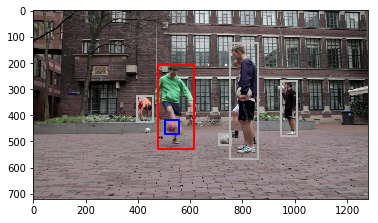

saving lololo/00000015.jpg


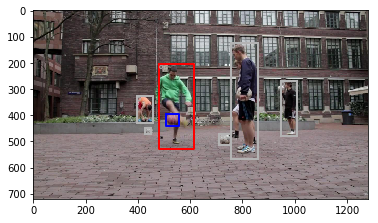

saving lololo/00000016.jpg


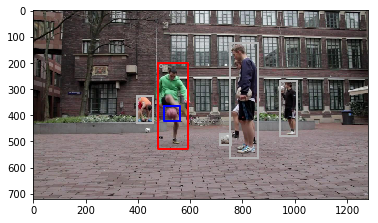

saving lololo/00000017.jpg


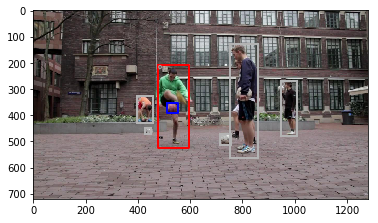

saving lololo/00000018.jpg


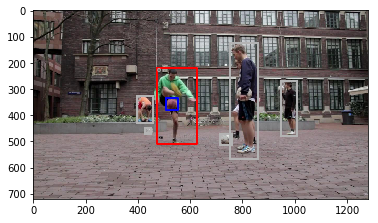

saving lololo/00000019.jpg


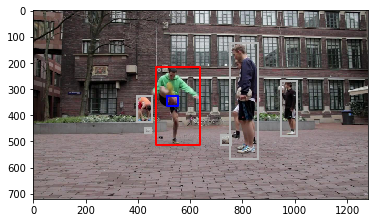

saving lololo/00000020.jpg


KeyboardInterrupt: 

In [60]:
# save_plot_single("/home/zabulskyy/Datasets/vot2016/leaves/00000100.jpg",
#                  pr_path="/home/zabulskyy/Projects/CTU-Research/results/yolo-blind/leaves.txt",
#                  gt_path="/home/zabulskyy/Datasets/vot2016/leaves/groundtruth.txt",
#                  force_square=True, gt_idx=101, pr_idx=101)
cls = "ball1"
met = "first_results_more_cc_first_init"

# save_plot_folder(osp.join("/home/zabulskyy/Datasets/vot2016", cls), saveto=osp.join("plots", met, cls),
#                  pr_path=osp.join("notebooks/" + met, cls) + ".csv",
#                  gt_path=osp.join(
#                      "/home/zabulskyy/Datasets/vot2016", cls, "groundtruth.txt"),
#                  force_square=True)

save_plot_everything(imgs_folder=osp.join("/home/zabulskyy/Datasets/vot2016", cls), yolo_pred_file=osp.join(yolo_pred_path, cls+".csv"),
                    pred_file=osp.join("./" + met, cls) + ".csv", saveto="lololo",
                    force_square=True, gt_file=osp.join(
                     "/home/zabulskyy/Datasets/vot2016", cls, "groundtruth.txt"))


# save_plot_folder("/home/zabulskyy/Datasets/vot2016/leaves", saveto="./plots/yolo-first-smart-smart/leaves",
#                 pr_path="./results/yolo-first-smart-smart/leaves.txt",
#                 gt_path="/home/zabulskyy/Datasets/vot2016/leaves/groundtruth.txt",
#                 force_square=True)

In [ ]:
dist(a[0].view([1, -1]), a[1].view([1, -1]))

In [61]:
fuck = {'bag': 0.47341449394132396,
  'ball1': 0.04066745546054344,
  'ball2': 0.01968759353660599,
  'basketball': 0.08591364331679942,
  'birds1': 0.3921305659682844,
  'birds2': 0.45740317332263886,
  'blanket': 0.172603747922678,
  'bmx': 0.6300109110970414,
  'bolt1': 0.2808943469874849,
  'bolt2': 0.5475087886257609,
  'book': 0.1441035796794451,
  'butterfly': 0.2156443579467966,
  'car1': 0.6491787929225329,
  'car2': 0.06424491817679769,
  'crossing': 0.5879241609277033,
  'dinosaur': 0.1553241665037338,
  'fernando': 0.515662651959916,
  'fish1': 0.0100746068440364,
  'fish2': 0.07322816945968362,
  'fish3': 0.4081342253822134,
  'fish4': 0.05187287344261048,
  'girl': 0.4962291888002887,
  'glove': 0.04299043131144828,
  'godfather': 0.020180477733239343,
  'graduate': 0.27383351199299727,
  'gymnastics1': 0.4757011380675518,
  'gymnastics2': 0.43384820471782165,
  'gymnastics3': 0.07143412677907762,
  'gymnastics4': 0.6442061806280363,
  'hand': 0.08472788852124055,
  'handball1': 0.0028024224057576316,
  'handball2': 0.06613589283362757,
  'helicopter': 0.02600585680138968,
  'iceskater1': 0.6477765964970537,
  'iceskater2': 0.578808090320845,
  'leaves': 0.0,
  'marching': 0.21135254870586478,
  'matrix': 0.03930155209327502,
  'motocross1': 0.4409126709782752,
  'motocross2': 0.29600126287717954,
  'nature': 0.05235303942705318,
  'octopus': 0.5819586222778861,
  'pedestrian1': 0.36362883539794993,
  'pedestrian2': 0.739905099710942,
  'rabbit': 0.00021607668653657693,
  'racing': 0.765155737134693,
  'road': 0.5549116377884301,
  'shaking': 0.08212679895837427,
  'sheep': 0.6274904191390392,
  'singer1': 0.1426826696760581,
  'singer2': 0.5789162481757931,
  'singer3': 0.1837715864090872,
  'soccer1': 0.048865984914190544,
  'soccer2': 0.02600265236755819,
  'soldier': 0.15208636096990777,
  'sphere': 0.16788527140509976,
  'tiger': 0.025769608266390145,
  'traffic': 0.4642776719210107,
  'tunnel': 0.4350842322685467,
  'wiper': 0.24880621169005496}

In [62]:
theor = {'blanket': 0.18291710391578664, 'bolt2': 0.5673433659957442, 'traffic': 0.5746887751799356, 'ball1': 0.10681770376159226, 'leaves': 0.0, 'pedestrian1': 0.6485712379493929, 'singer3': 0.1838025259729119, 'helicopter': 0.1579965510567808, 'godfather': 0.15425687802065252, 'soccer1': 0.08186977937811162, 'book': 0.17279531273915943, 'tunnel': 0.4368175031466086, 'gymnastics1': 0.655671257247941, 'basketball': 0.6585782702907222, 'birds1': 0.41405993255774654, 'car1': 0.7267896246948623, 'ball2': 0.01968759353660599, 'birds2': 0.6138320619512763, 'motocross1': 0.46280815041663936, 'bmx': 0.6582125426406513, 'gymnastics2': 0.5813593790121165, 'fish3': 0.41171868354285635, 'motocross2': 0.30778527365118846, 'soccer2': 0.49052709110984866, 'octopus': 0.5884044642442106,'fernando': 0.572051807102179, 'shaking': 0.11367979973417805, 'crossing': 0.6059558512367549, 'singer2': 0.6812222153365551, 'soldier': 0.12212306841040095, 'pedestrian2': 0.7399028766237007, 'nature': 0.5475603649345746, 'butterfly': 0.2175166359839938, 'road': 0.564176788029112, 'iceskater2': 0.6318364015558268, 'sphere': 0.20921765986603758, 'fish2': 0.05880601855436447, 'graduate': 0.6654342338461118, 'marching': 0.26653386183293803, 'rabbit': 0.00021607668653657693, 'car2': 0.1292966751871406, 'matrix': 0.06770082796018426, 'girl': 0.7501918525866975, 'tiger': 0.036646759878251195, 'gymnastics4': 0.6688527570458505, 'wiper': 0.2616305577015176, 'racing': 0.765155737134693, 'dinosaur': 0.29709394329196565, 'bolt1': 0.6448989225335147, 'hand': 0.08545657437107575, 'handball1': 0.2327957603232915, 'bag': 0.4744404017094571, 'sheep': 0.6271279244096969, 'iceskater1': 0.6477351861750958, 'fish1': 0.010541884640825602, 'singer1': 0.612334547639468, 'gymnastics3': 0.387277998339298, 'fish4': 0.04605607976707805, 'glove': 0.06290541098156799, 'handball2': 0.2643525882509363}

In [ ]:
1e-2

In [68]:
opa=0
fuc=0
tot=0
for i in theor:
    diff = theor[i] - fuck[i]
    if fuck[i] / (theor[i]+1e-10) > .8:
        diff = "YEAH"
        fuc+=1
    if theor[i] - fuck[i] < 1e-2:
        diff = "HURRAY"
        opa+=1
        
    print(diff, fuck[i], theor[i], i, sep="\t")
    tot+=1
    
opa/tot
fuc/tot
    

YEAH	0.172603747922678	0.18291710391578664	blanket
YEAH	0.5475087886257609	0.5673433659957442	bolt2
YEAH	0.4642776719210107	0.5746887751799356	traffic
0.06615024830104882	0.04066745546054344	0.10681770376159226	ball1
HURRAY	0.0	0.0	leaves
0.28494240255144293	0.36362883539794993	0.6485712379493929	pedestrian1
HURRAY	0.1837715864090872	0.1838025259729119	singer3
0.13199069425539112	0.02600585680138968	0.1579965510567808	helicopter
0.1340764002874132	0.020180477733239343	0.15425687802065252	godfather
0.03300379446392107	0.048865984914190544	0.08186977937811162	soccer1
YEAH	0.1441035796794451	0.17279531273915943	book
HURRAY	0.4350842322685467	0.4368175031466086	tunnel
0.17997011918038913	0.4757011380675518	0.655671257247941	gymnastics1
0.5726646269739228	0.08591364331679942	0.6585782702907222	basketball
YEAH	0.3921305659682844	0.41405993255774654	birds1
YEAH	0.6491787929225329	0.7267896246948623	car1
HURRAY	0.01968759353660599	0.01968759353660599	ball2
0.1564288886286374	0.4574031733226388

0.5666666666666667

In [64]:
prev_frames = []
for frame in video:
    yp = yolo_predictions(frame)
    do_dp(frame, prev_frames)

NameError: name 'video' is not defined